# Problem Set 1 CS129.18

The following problem set will revolve around hourly Philippine weather data observations from 1978 to 2018 sourced from NOAA (National Oceanic and Atmospheric Administration). 

The dataset `PH_Weather_v1.csv` has **11** columns. The columns are described as follows.

* **datetime** maps to a YYYYMMDDSSSS string datetime format.
* **wind_direction** represents the recorded compass direction of the wind. 
* **wind_speed** is the wind speed recorded in MPH.
* **gust_speed** is the gust speed recorded in MPH. NAN if no recording.
* **sea_level_pressure** is sea level pressure in millibars estimated to the nearest tenth.
* **temperature** is the recorded temperature in celsius.
* **altitude** is the station altimeter recording in inches. NAN if no recording.
* **precipitation** is the station hourly precipitation report in inches. NAN if no recording.
* **clouds** is the station observed cloud report.
    * CLR-CLEAR 
    * SCT-SCATTERED
    * BKN-BROKEN
    * OVC-OVERCAST, 
    * OBS-OBSCURED
    * POB-PARTIAL OBSCURATION 
* **visibility** is the station observed visibility in miles
* **humidity** is the station observed relative humidity

## Requirements


>Atmospheric Science is a complex system that works with factors that interact with each other. We might be able use these variables to estimate the value of one of the key indicators: Temperature.

Using the lessons on Linear Regression I and II, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. What is the dimensionality or shape of the data? ( 1pt )

2. What is mean temperature for the year 2017? ( 3pts )

3. Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature. ( 4pts )

4. Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot). ( 5pts )

5. Solve for the Mean Squared Error of your predicted temperature against the actual temperature. ( 2pts )

6. Solve for the R^2 score of the linear model used to predict temperature. ( 2pts )

7. Identify if the model is a good model and why. ( 3pts )



-----


Bonus 1 : What is your name?

If **you're the only one in the class** that answers Bonus 1, **only you** get **5 points**. 

If **everyone in the class** answers Bonus 1, **you all** get **0 points**.

If **no one in the class** answers Bonus 1, **everyone** gets **2 points**.

*Don't worry, your answer here will not be disclosed to the class*

----

**Submit this file on Moodle on the submission link I will provide. This is due September 13 12nn.**

In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/PH_Weather_v1.csv")

In [3]:
df.head()
df

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity
0,197809140300,160,2,NaN,1007.7,30,NaN,NaN,BKN,15.6,0.75
1,197810021500,0,0,NaN,1011.3,26,NaN,NaN,OVC,6.2,0.94
2,197810252100,360,9,NaN,1004.1,26,NaN,NaN,BKN,6.2,0.80
3,197810260000,360,21,NaN,1006.3,26,NaN,NaN,OVC,6.2,0.80
4,197811131500,0,0,NaN,1010.1,26,NaN,NaN,BKN,11.2,0.88
...,...,...,...,...,...,...,...,...,...,...,...
90560,201809010900,0,0,NaN,1007.0,28,NaN,NaN,BKN,7.5,0.80
90561,201809011200,70,4,NaN,1008.1,28,NaN,NaN,BKN,7.5,0.86
90562,201809011500,70,4,NaN,1008.9,27,NaN,NaN,BKN,7.5,0.80
90563,201809011800,340,7,NaN,1007.9,27,NaN,NaN,BKN,7.5,0.77


In [4]:
print(f'{df.shape} \n') # 1. The dimensionality of the data is (90565, 11)
print(df.dtypes)

(90565, 11) 

datetime                int64
wind_direction          int64
wind_speed              int64
gust_speed            float64
sea_level_pressure    float64
temperature             int64
altitude              float64
precipitation         float64
clouds                 object
visibility            float64
humidity              float64
dtype: object


In [5]:
df_year = df[df['datetime'].astype('str').str.startswith('2017')]
df_year['temperature'].mean() # 2. The temperature mean for 2017 is 27.93

27.93335635359116

In [6]:
# Check columns that contain NaN values
df.isna().any()

datetime              False
wind_direction        False
wind_speed            False
gust_speed             True
sea_level_pressure    False
temperature           False
altitude               True
precipitation          True
clouds                False
visibility            False
humidity              False
dtype: bool

In [7]:
# Check unique values in columns containing NaN
unique_gust = df['gust_speed'].value_counts()
unique_altitude = df['altitude'].value_counts()
unique_precipitation = df['precipitation'].value_counts()

print(f'Unique values in gust_speed: \n{unique_gust}\n') # Only 1 unique value for gust_speed
print(f'Unique values in altitude: \n{unique_altitude}\n') # No unique values for altitude
print(f'Unique values in precipitation: \n{unique_precipitation}\n') # 7 unique values for precipitation

Unique values in gust_speed: 
46.0    1
Name: gust_speed, dtype: int64

Unique values in altitude: 
Series([], Name: altitude, dtype: int64)

Unique values in precipitation: 
0.04    6
0.28    2
0.08    1
1.14    1
0.35    1
0.24    1
0.87    1
Name: precipitation, dtype: int64



In [8]:
# Convert categorical values to numerical using one hot encoding
y = pd.get_dummies(df.clouds, prefix='clouds') 
df = df.join(y)
df = df.drop(['clouds','clouds_***'], axis = 1)
df

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,visibility,humidity,clouds_BKN,clouds_CLR,clouds_OBS,clouds_OVC,clouds_SCT
0,197809140300,160,2,NaN,1007.7,30,NaN,NaN,15.6,0.75,1,0,0,0,0
1,197810021500,0,0,NaN,1011.3,26,NaN,NaN,6.2,0.94,0,0,0,1,0
2,197810252100,360,9,NaN,1004.1,26,NaN,NaN,6.2,0.80,1,0,0,0,0
3,197810260000,360,21,NaN,1006.3,26,NaN,NaN,6.2,0.80,0,0,0,1,0
4,197811131500,0,0,NaN,1010.1,26,NaN,NaN,11.2,0.88,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90560,201809010900,0,0,NaN,1007.0,28,NaN,NaN,7.5,0.80,1,0,0,0,0
90561,201809011200,70,4,NaN,1008.1,28,NaN,NaN,7.5,0.86,1,0,0,0,0
90562,201809011500,70,4,NaN,1008.9,27,NaN,NaN,7.5,0.80,1,0,0,0,0
90563,201809011800,340,7,NaN,1007.9,27,NaN,NaN,7.5,0.77,1,0,0,0,0


In [9]:
# Create 2 data frames with different characteristics (dropped the columns containing NaN, interpolate values for NaN using df.interpolate())
df_dropped = df.dropna(axis=1, how='any')

df_interpolated = df.drop(['altitude'], axis = 1)
df_interpolated = df_interpolated.interpolate()

# Remove rows that still contain NaN
df_interpolated = df_interpolated.dropna(axis=0, how='any')

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Dropped the following features:
# Datetime - does not directly affect temperature
# Temperature - the output

X_dropped = df_dropped.drop(['datetime','temperature'], axis = 1)
#X_dropped = X_dropped.drop(X_dropped.columns[5:10], axis = 1)

X_interpolated = df_interpolated.drop(['datetime','temperature'], axis = 1)
#X_interpolated = X_interpolated.drop(X_interpolated.columns[6:12], axis = 1)

# Standardize the data
scaled_dropped = StandardScaler().fit_transform(X_dropped)
X_dropped = pd.DataFrame(scaled_dropped, columns=X_dropped.columns)

scaled_interpolated = StandardScaler().fit_transform(X_interpolated)
X_interpolated = pd.DataFrame(scaled_interpolated, columns=X_interpolated.columns)

In [11]:
linear_model_dropped = LinearRegression().fit(X_dropped, df_dropped['temperature'])

beta_coeff_dropped = pd.DataFrame(list(zip(X_dropped.columns, linear_model_dropped.coef_))) # Beta coefficients of columns used for prediction
print(f'Beta Coefficients of Dropped NaN model:\n {beta_coeff_dropped}\n')

Beta Coefficients of Dropped NaN model:
                     0         1
0      wind_direction  0.171471
1          wind_speed  0.360916
2  sea_level_pressure -0.006245
3          visibility  0.327861
4            humidity -1.392111
5          clouds_BKN -0.220123
6          clouds_CLR -0.065353
7          clouds_OBS -0.018463
8          clouds_OVC -0.217131
9          clouds_SCT -0.301174



In [12]:
linear_model_interpolated = LinearRegression().fit(X_interpolated, df_interpolated['temperature'])

beta_coeff_interpolated = pd.DataFrame(list(zip(X_interpolated.columns, linear_model_interpolated.coef_))) # Beta coefficients of columns used for prediction
print(f'Beta Coefficients of Interpolated NaN model: \n{beta_coeff_interpolated}\n')

Beta Coefficients of Interpolated NaN model: 
                     0             1
0       wind_direction  9.678423e-02
1           wind_speed  3.940026e-01
2           gust_speed  8.326673e-16
3   sea_level_pressure -6.148251e-03
4        precipitation  1.630823e-01
5           visibility  5.135441e-01
6             humidity -1.206827e+00
7           clouds_BKN -2.925977e-01
8           clouds_CLR -6.938894e-16
9           clouds_OBS -1.536100e-02
10          clouds_OVC -3.420299e-01
11          clouds_SCT -2.759499e-01



[]

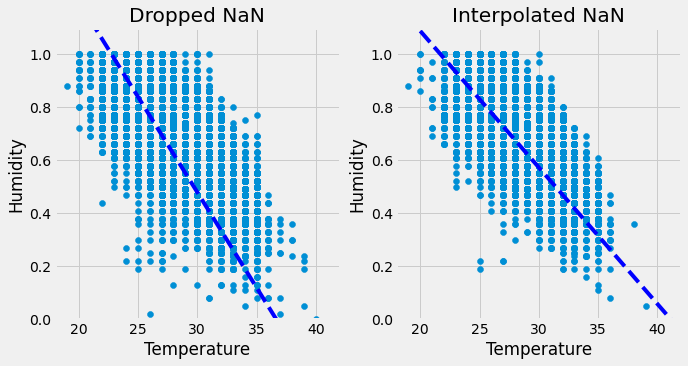

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(df_dropped["temperature"], df_dropped["humidity"])
plt.plot([20,45], [1.2, -0.6], '--bo')
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.title("Dropped NaN")
plt.ylim(0,1.1)
plt.xlim(18,42)
plt.plot()

plt.subplot(1,2,2)
plt.scatter(df_interpolated["temperature"], df_interpolated["humidity"])
plt.plot([12,45], [1.5, -0.2], '--bo')
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.title("Interpolated NaN")
plt.ylim(0,1.1)
plt.xlim(18,42)
plt.plot()

# 4. As relative humidity decreases, temperature increases

In [14]:
# 5 and 6
# - There is a ~4.2% difference in the R^2 scores of the Dropped and Interpolated NaN models. 
                               
mse_dropped = mean_squared_error(df_dropped["temperature"], linear_model_dropped.predict(X_dropped))
lf_dropped_score = linear_model_dropped.score(X_dropped, df_dropped["temperature"])
mse_interpolated = mean_squared_error(df_interpolated["temperature"], linear_model_interpolated.predict(X_interpolated))
lf_interpolated_score = linear_model_interpolated.score(X_interpolated, df_interpolated["temperature"])

print(f'MSE of Dropped NaN model: {mse_dropped}')
print(f'Score of Dropped NaN model: {lf_dropped_score}\n')
print(f'MSE of Interpolated NaN model: {mse_interpolated}')
print(f'Score of Interpolated NaN model: {lf_interpolated_score}')

MSE of Dropped NaN model: 2.7478861233409515
Score of Dropped NaN model: 0.47660101670410704

MSE of Interpolated NaN model: 2.4765306774786824
Score of Interpolated NaN model: 0.5159716154695758


---
7. While the model captured the concept of relative humidity being inversely proportional to temperature, I would not consider these as good models. Based on the scores, the models can only correctly predict temperatures by ~50%.  Moreover, while the interpolated model has a higher score, this is possibly due to the reduced number of rows that have led to incorrect predictions (which we can test by dropping the columns that have interpolated values as shown below). Interpolation of the NaN values may have been ineffective due to the lack of data points to interpolate from.
---

In [15]:
X_interpolated = df_interpolated.drop(['datetime','temperature','precipitation','gust_speed'], axis = 1)
X_interpolated = X_interpolated.drop(X_interpolated.columns[7:12], axis = 1)

linear_model_interpolated = LinearRegression().fit(X_interpolated, df_interpolated['temperature'])
lf_interpolated_score = linear_model_interpolated.score(X_interpolated, df_interpolated["temperature"])
print(f'Score of Interpolated NaN model without columns with interpolated values: {lf_interpolated_score}')

Score of Interpolated NaN model without columns with interpolated values: 0.5110760940122384
